Helper code for making plots:

In [1]:
import numpy as np
import torch
import cv2
import onnxruntime as ort

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_detections(img, detections):
    """
    在图像上绘制人脸检测结果
    
    参数:
        img: 输入图像,支持(H,W,3)或(3,H,W)格式
        detections: 检测结果张量,shape为(num_detections,5),包含:
            - detections[i,0:4]: 边界框坐标 [ymin,xmin,ymax,xmax] (相对坐标,范围0-1)
            - detections[i,4]: 置信度分数
    """
    # 确保图像为HWC格式
    if isinstance(img, np.ndarray):
        if len(img.shape) == 3:
            if img.shape[0] == 3:  # CHW -> HWC
                img = img.transpose(1, 2, 0)
            elif img.shape[-1] != 3:
                raise ValueError("输入图像格式错误: 需要HWC或CHW格式")
    
    # 打印输入的shape信息
    print(f"Input image shape: {img.shape}")
    print(f"Detections shape: {detections.shape}")
    
    # 创建10x10英寸的图像窗口
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.grid(False)
    ax.imshow(img)
    
    # 将检测结果转换为numpy数组
    if isinstance(detections, torch.Tensor):
        detections = detections.cpu().numpy()

    # 如果只有一个检测结果,扩展维度
    if detections.ndim == 1:
        detections = np.expand_dims(detections, axis=0)

    print("Found %d faces" % detections.shape[0])
        
    # 遍历每个检测到的人脸
    for i in range(detections.shape[0]):
        # 计算边界框坐标
        ymin = detections[i, 0] * img.shape[0]
        xmin = detections[i, 1] * img.shape[1]
        ymax = detections[i, 2] * img.shape[0]
        xmax = detections[i, 3] * img.shape[1]

        # 绘制亮黄色边界框,加粗线条
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                 linewidth=2.5, edgecolor="#FFD700", facecolor="none", 
                                 alpha=1)
        ax.add_patch(rect)
    plt.show()

In [3]:
# 从测试集目录读取图片
test_dir = "./dataset/test_face"
import os

# 获取测试目录下所有图片文件的绝对路径
image_paths = []
for filename in os.listdir(test_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_paths.append(os.path.join(test_dir, filename))


In [9]:
from infer.retinaface_inference import RetinaFaceInference
from infer.blazeface_inference import BlazeFaceInference
from infer.yolov5_inference import YOLOV5FaceInference
from infer.ultra_light_inference import UltraLightFaceDetectorONNX

detector1 = RetinaFaceInference(
    # model_path="./models/retainface/retinaface_mv1_0.25.onnx"
    model_path="./models/retainface/retinaface_mv2.onnx"
)

detector2 = YOLOV5FaceInference(
    model_path="./models/yolo5face/yolov5n-0.5.onnx"
)
detector3 = BlazeFaceInference(
    model_path="./models/blaze_face/blazeface_128.onnx",
    anchors_path="./models/blaze_face/anchors_128.npy",
)

detector4 = RetinaFaceInference(
    model_path="./models/ultra_light/faceDetector_320.onnx",
    input_size=(320,320)
)

detector = detector4

In [10]:
detections, origin_images,_ = detector.infer(image_paths, batch_size=1)

detections[2].shape
detections[2]


ValueError: operands could not be broadcast together with shapes (5875,2) (4200,2) 

Input image shape: (732, 1024, 3)
Detections shape: (555, 5)
Found 555 faces


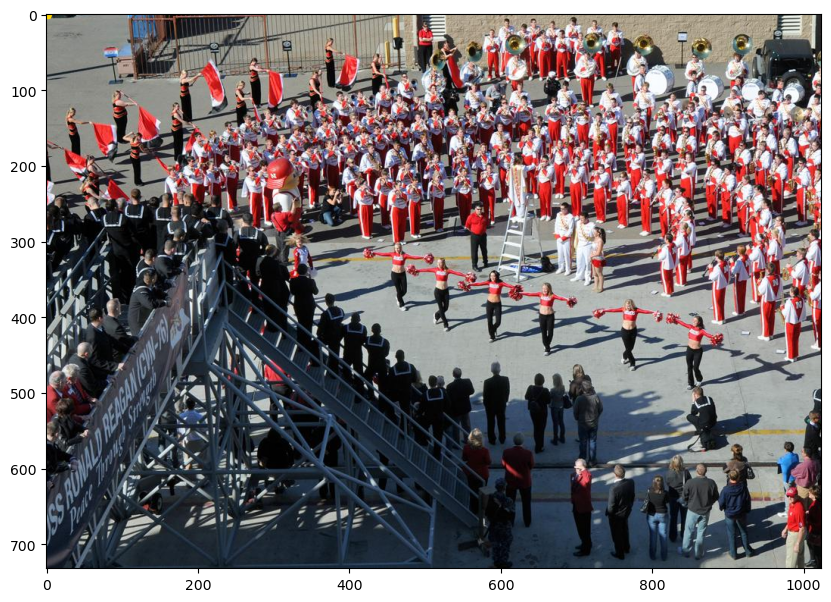

In [6]:
plot_detections(origin_images[0], detections[0])


Input image shape: (768, 1024, 3)
Detections shape: (38, 5)
Found 38 faces


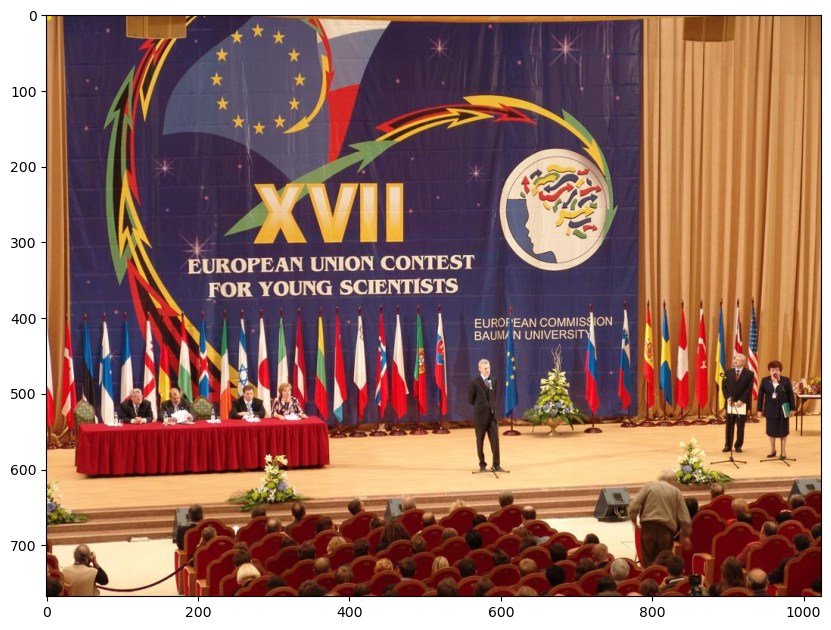

In [7]:
plot_detections(origin_images[1], detections[1])


Input image shape: (128, 128, 3)
Detections shape: (34, 5)
Found 34 faces


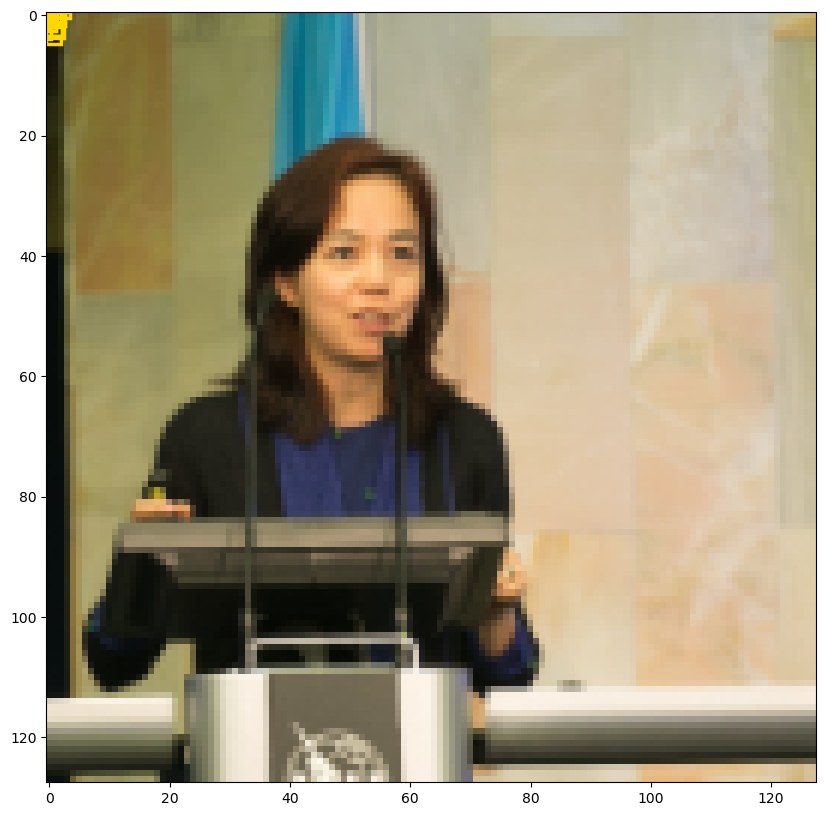

In [8]:
plot_detections(origin_images[2], detections[2])


Input image shape: (684, 1024, 3)
Detections shape: (1, 5)
Found 1 faces


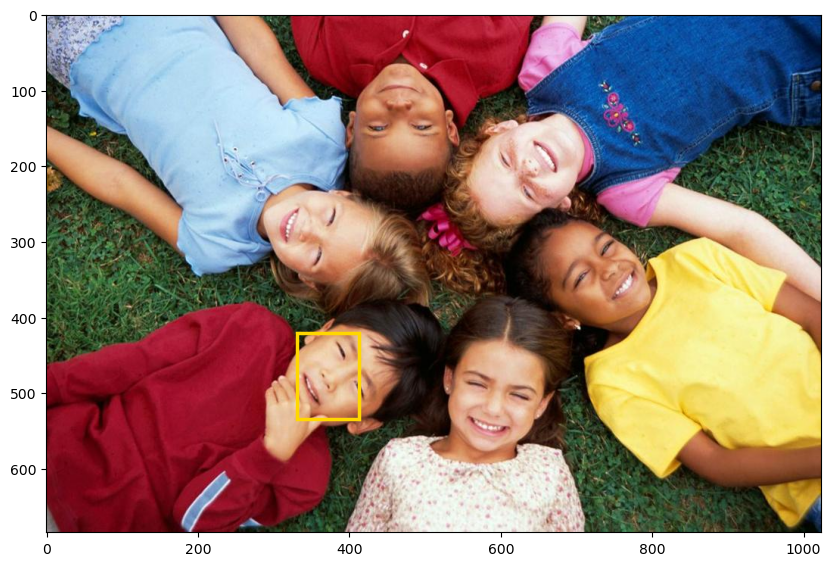

array([[0.61502533, 0.32317499, 0.78053627, 0.40305619, 0.00089304]])

In [8]:
plot_detections(origin_images[3], detections[3])
detections[3]


Input image shape: (128, 128, 3)
Detections shape: (3, 5)
Found 3 faces


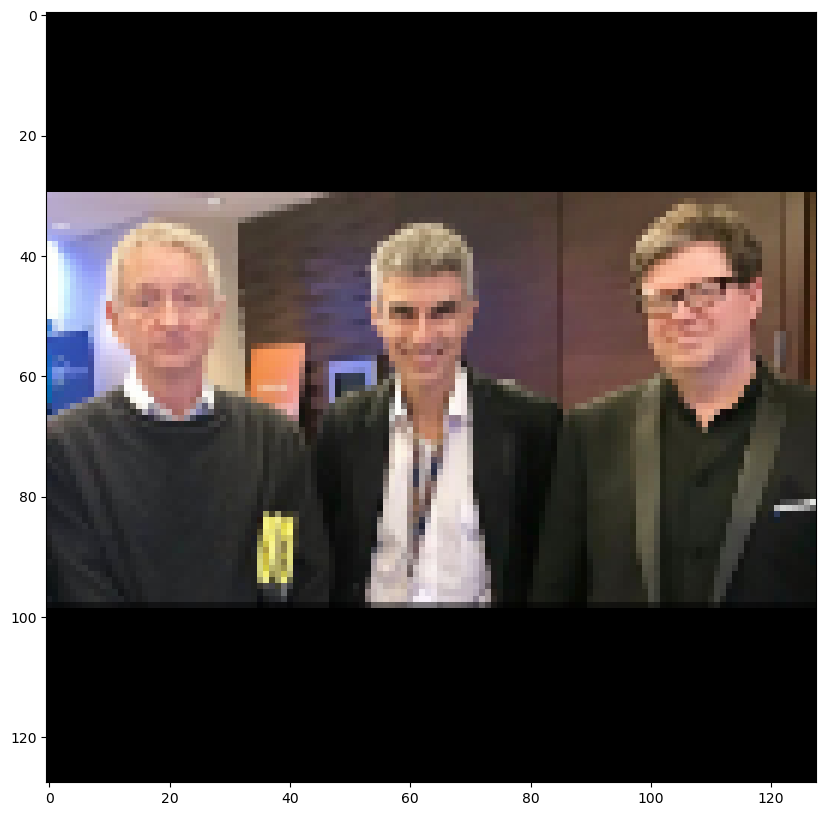

In [10]:
plot_detections(origin_images[4], detections[4])

Input image shape: (128, 128, 3)
Detections shape: (4, 5)
Found 4 faces


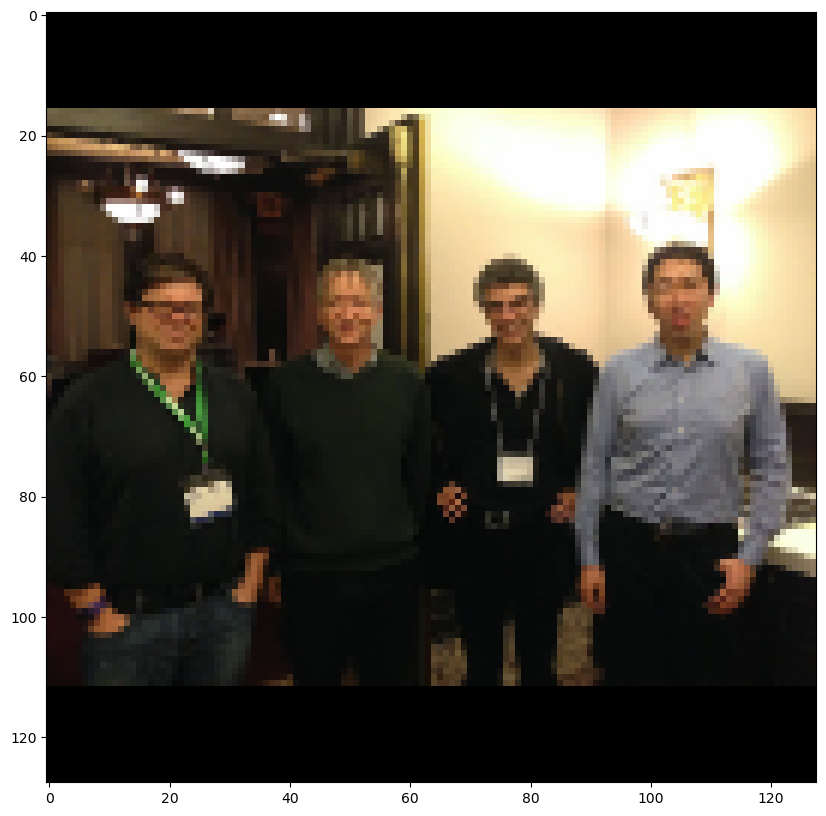

In [6]:
plot_detections(origin_images[5], detections[5])

Input image shape: (683, 1024, 3)
Detections shape: (7, 5)
Found 7 faces


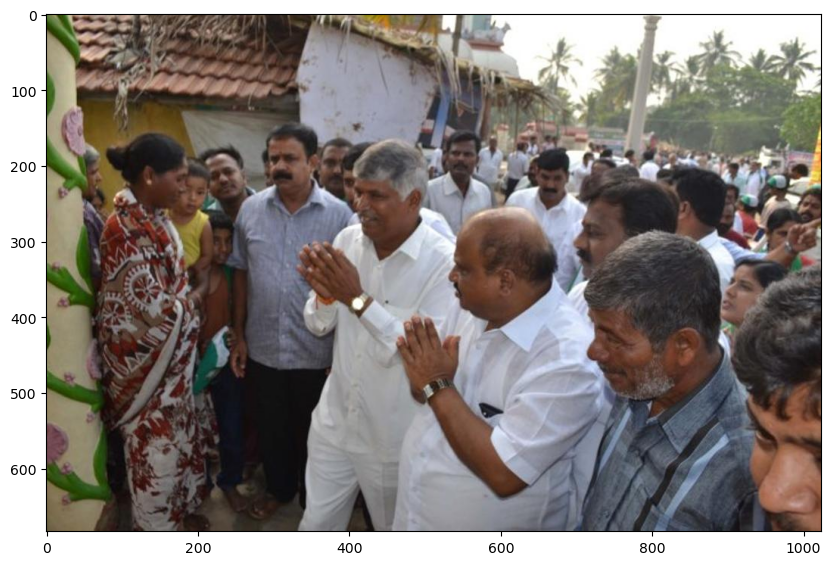

In [15]:
plot_detections(origin_images[6], detections[6])